<a href="https://colab.research.google.com/github/abhi-gm/Machine-Learning-Workshop/blob/Classical-Machine-Learning/1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear regression**
## 1. **Abstract**


The insurance risk are important point of estimation for the insurance company. The aim of the notebook is to find the factors affecting the this and creating a regression model to predict this.

## Linear Models

Linear regression predicts the response variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

*Simple* regression use only one predictor variable $x$. *Mulitple* regression uses a set of predictor variables $x_1, x_2, ,,, x_n$.

The *response variable* $y$ is also called the regressand, forecast, dependent or explained variable. The *predictor variable* $x$ is also called the regressor, independent or explanatory variable.

The parameters $\beta_0$ and $\beta_1$ determine the intercept and the slope of the line respectively. The intercept $\beta_0$ represents the predicted value of $y$ when $x=0$. The slope $\beta_1$ represents the predicted increase in $Y$ resulting from a one unit increase in $x$.

Note that the regression equation is just our famliar equation for a line with an error term.

The equation for a line:  
$$ Y = bX + a $$

$$y = \beta_0 + \beta_1 x $$

The equation for a line with an error term:  

$$ Y = bX + a + \varepsilon $$

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

- $b$ = $\beta_1$ = slope
- $a$ = $\beta_0$ = $Y$ intercept
- $\varepsilon$ = error term


We can think of each observation $y_i$ consisting of the systematic or explained part of the model, $\beta_0+\beta_1x_i$, and the random *error*, $\varepsilon_i$.




## **2. Importing necessary libraries**

In [ ]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt

## **3. Data Loading and Preprocessing**

Data is stored in the our github

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Angelic-Interpretability/Model-Interpretability-Techniques/master/Datasets/insurance.csv'
data = pd.read_csv(url, error_bad_lines=False)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **3.1. Encoding the sex and smoker**

### **Sex**

Male = 0

Female = 1

### **Smoker**

Yes = 1

No = 0

In [ ]:
data['sex'] = data.sex.map({'male':0, 'female':1})

data['smoker'] = data.smoker.map({'no':0, 'yes':1})

data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


Identfying the Unique values in the Region column

In [ ]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['region']]).toarray())
enc_df
enc_df.columns = ['northeast','northwest','southeast','southwest'] 

enc_df.apply(np.int64)
data =data.join(enc_df)
data=data.drop(['region'],axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


## **3.3. Normalizing the data**

In [ ]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = data[['charges','bmi','age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['charges','bmi','age']] = pd.DataFrame(x_scaled)

In [ ]:
#looking at data head after adding dummy variables and nromalizing
data.head(20)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1,0.321227,0,1,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0,0.479150,1,0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,0,0.458434,3,0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,0,0.181464,0,0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,0,0.347592,0,0,0.043816,0.0,1.0,0.0,0.0
5,0.282609,1,0.263115,0,0,0.042056,0.0,0.0,1.0,0.0
6,0.608696,1,0.470272,1,0,0.113629,0.0,0.0,1.0,0.0
7,0.413043,1,0.316922,3,0,0.098320,0.0,1.0,0.0,0.0
8,0.413043,0,0.373150,2,0,0.084352,1.0,0.0,0.0,0.0
9,0.913043,1,0.265806,0,0,0.443765,0.0,1.0,0.0,0.0


In [ ]:
#finding the correlation between all the features in the data
data.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


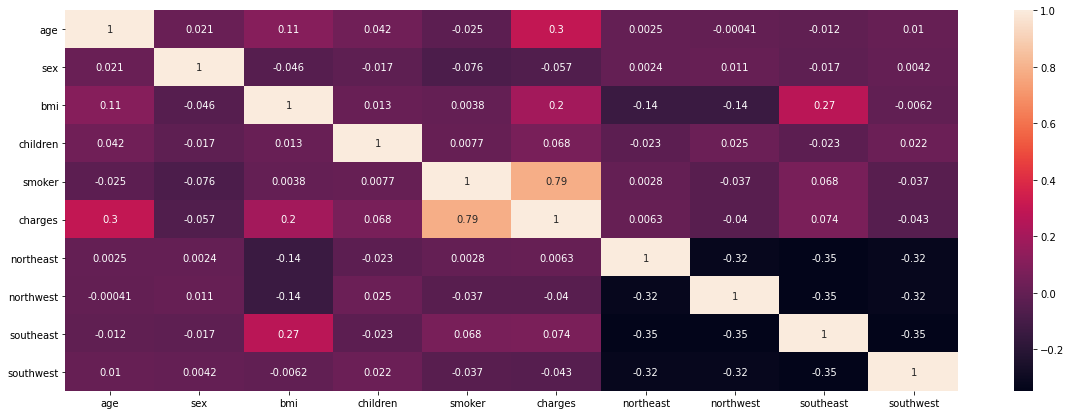

In [ ]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

## **4. Ordinary Least Squares**
Ordinary Least Squares (OLS) is the most common estimation method for linear models

In [ ]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(data['charges'], data[['age', 'sex', 'bmi', 'children', 'smoker','northeast',
       'northwest', 'southeast', 'southwest']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:46:34   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1886      0.009     21.587      0.000       0.171       0.206
sex            0.0021      0.005      0.394      0.693      -0.008       0.013
bmi            0.2012      0.017     11.860      0.000       0.168       0.235
children       0.0076      0.002      3.451      0.001       0.003       0.012
smoker         0.3807      0.007     57.723      0.000       0.368       0.394
northeast     -0.0504      0.010     -5.277      0.000      -0.069      -0.032
northwest     -0.0560      0.010     -5.849      0.000      -0.075      -0.037
southeast     -0.0669      0.011     -6.280      0.000      -0.088      -0.046
southwest     -0.0657      0.010     -6.590      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS after removing insignificant feature "sex"

In [ ]:
model = sm.OLS(data['charges'], data[['age','bmi', 'children', 'smoker','northeast',
       'northwest', 'southeast', 'southwest']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:46:34   Log-Likelihood:                 1230.8
No. Observations:                1338   AIC:                            -2446.
Df Residuals:                    1330   BIC:                            -2404.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1887      0.009     21.610      0.000       0.172       0.206
bmi            0.2009      0.017     11.858      0.000       0.168       0.234
children       0.0076      0.002      3.445      0.001       0.003       0.012
smoker         0.3805      0.007     57.875      0.000       0.368       0.393
northeast     -0.0492      0.009     -5.425      0.000      -0.067      -0.031
northwest     -0.0548      0.009     -6.031      0.000      -0.073      -0.037
southeast     -0.0657      0.010     -6.430      0.000      -0.086      -0.046
southwest     -0.0645      0.010     -6.787      0.000      -0.083      -0.046
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **5. Pair Plot**

<Figure size 864x720 with 0 Axes>

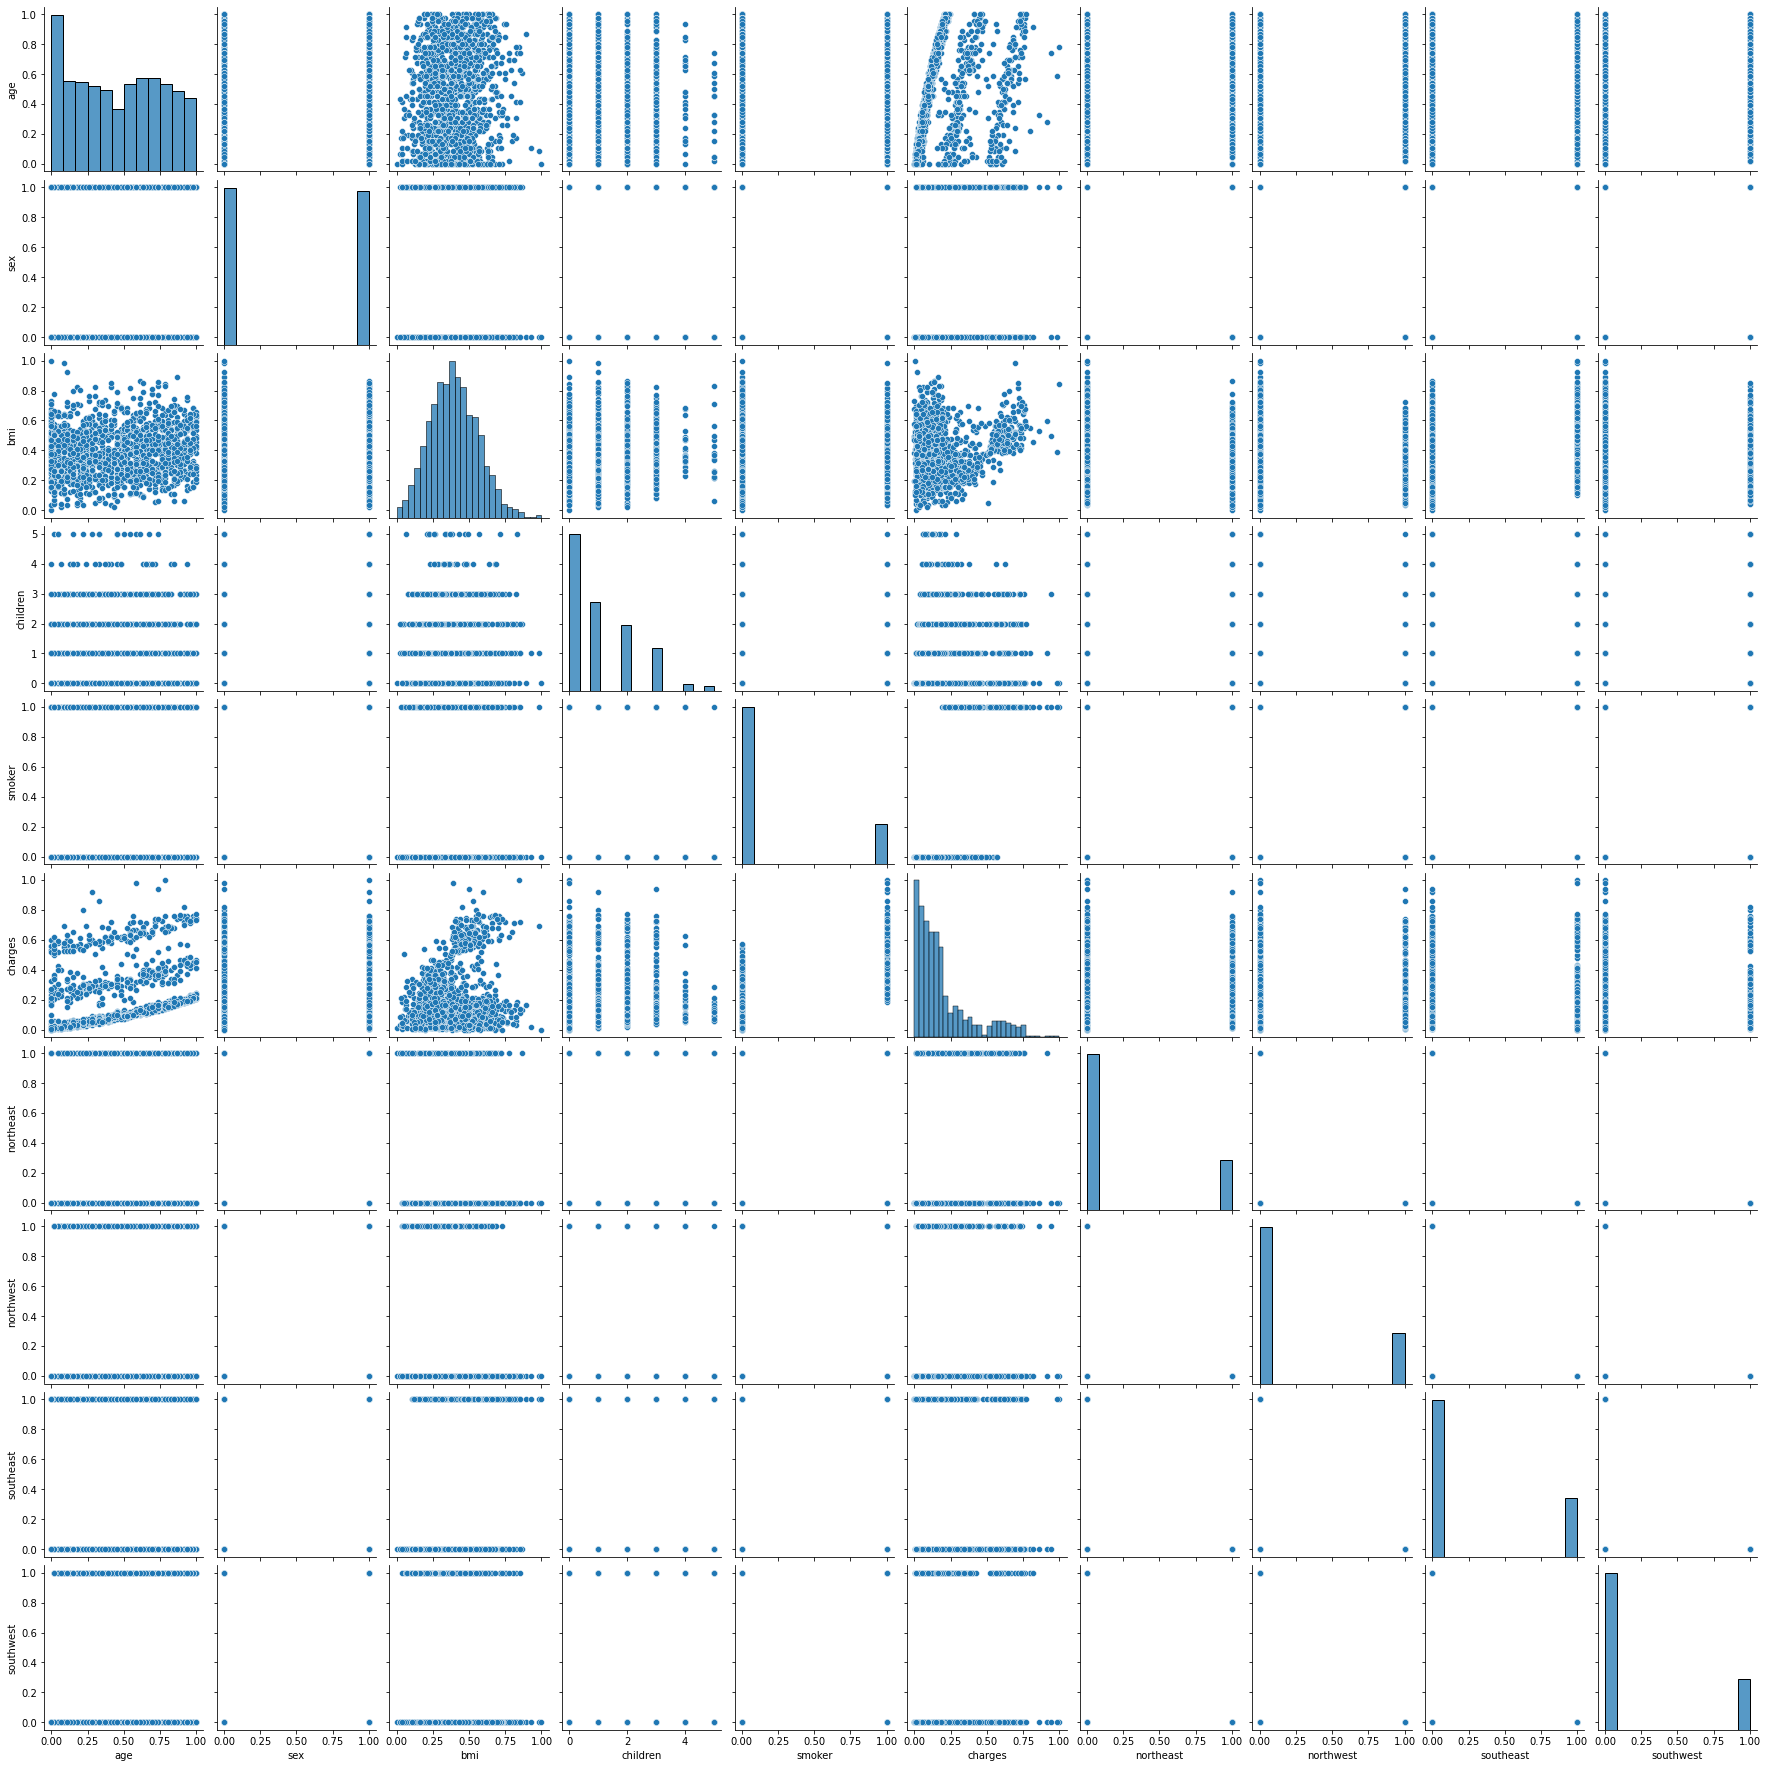

In [ ]:
#pair plot
plt.figure(figsize=(12,10))
sns.pairplot(data)

## **6. Train ,Validation and Test split**

Data is split into 3 parts

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[ ['age', 'bmi', 'children', 'smoker','northeast','northwest', 'southeast', 'southwest']]

y = data['charges']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

## **7. Linear Regression**

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model = regr.fit(X_train,y_train)



In [ ]:
#Validation set used for tunning the hyperparmeter


# Make predictions using the Validation sets
y_pred = regr.predict(X_val)


# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Mean squared error: 0.01
Coefficient of determination: 0.75


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The mean squared error
print('Mean squared error on the Test dataset : %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score for Test dataset : %.2f'% r2_score(y_test, y_pred))

Mean squared error on the Test dataset : 0.01
R2 score for Test dataset : 0.61


## **7. Conclusion**
The linear regression model is trained and interpreted based on p-value and those features with a p-value above 0.05 dropped as they do not affect.

## **8. Refrence**
https://www.statsmodels.org/stable/regression.html

Copyright 2020 Abhishek Gargha Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.